In [14]:
import pandas as pd
from barplots import barplots
import shutil
import os

In [7]:
df = pd.read_csv("approximated_walks.csv")
df["Max Neighbours"] = [
    "10" if val == 10 else "Max"
    for val in df["Max Neighbours"].values
]
df

,run_type,embedding_model,Max Neighbours,loss,accuracy,recall,precision,AUROC,AUPRC,f1_score,balanced_accuracy,specificity,miss_rate,fall_out,mcc
0,train,SkipGram,10,0.129557,0.962037,0.962034,0.962039,0.992005,0.991220,0.962036,0.962037,0.962040,0.037966,0.037960,0.924073
1,test,SkipGram,10,0.147156,0.956834,0.951787,0.961493,0.989533,0.989616,0.956615,0.956834,0.961882,0.048213,0.038118,0.913715
2,train,SkipGram,Max,0.120389,0.965638,0.962744,0.968348,0.993200,0.992583,0.965538,0.965638,0.968531,0.037256,0.031469,0.931291
3,test,SkipGram,Max,0.138156,0.960222,0.951605,0.968292,0.990829,0.991085,0.959876,0.960222,0.968839,0.048395,0.031161,0.920581
4,train,SkipGram,10,0.135195,0.957820,0.975852,0.941885,0.991038,0.990056,0.958567,0.957820,0.939789,0.024148,0.060211,0.916237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,test,SkipGram,Max,0.137106,0.961092,0.952929,0.968745,0.990952,0.991054,0.960772,0.961092,0.969255,0.047071,0.030745,0.922307
116,train,SkipGram,10,0.132786,0.958132,0.977531,0.941021,0.991570,0.990782,0.958928,0.958132,0.938732,0.022469,0.061268,0.916954
117,test,SkipGram,10,0.147710,0.953746,0.968985,0.940324,0.989164,0.989268,0.954440,0.953746,0.938506,0.031015,0.061494,0.907913
118,train,SkipGram,Max,0.130163,0.959370,0.977660,0.943160,0.991560,0.990596,0.960100,0.959370,0.941081,0.022340,0.058919,0.919355


In [11]:
from scipy.stats import wilcoxon
results = []

for metric in df.columns[4:]:
    first = df[df.run_type == "test"][df["Max Neighbours"] == "Max"][metric]
    second = df[df.run_type == "test"][df["Max Neighbours"] == "10"][metric]
    statistic, p_value = wilcoxon(first, second)
    results.append({
        "Metric": metric,
        "P-value": p_value,
        "Statistic": statistic,
        "Mean Max": first.mean(),
        "STD Max": first.std(),
        "Mean 10": second.mean(),
        "STD 10": second.std()
    })
results = pd.DataFrame(results).T
new_header = results.iloc[0] #grab the first row for the header
results = results[1:] #take the data less the header row
results.columns = new_header #set the header row as the df header
print(results[["accuracy", "AUROC", "AUPRC", "f1_score"]].to_latex(float_format="{:0.3f}".format))

\begin{tabular}{lllll}
\toprule
Metric & accuracy &  AUROC &  AUPRC & f1\_score \\
\midrule
P-value   &    0.001 &  0.001 &  0.001 &    0.001 \\
Statistic &   64.000 & 67.000 & 75.000 &   67.000 \\
Mean Max  &    0.956 &  0.990 &  0.990 &    0.957 \\
STD Max   &    0.002 &  0.001 &  0.001 &    0.002 \\
Mean 10   &    0.954 &  0.989 &  0.989 &    0.955 \\
STD 10    &    0.003 &  0.001 &  0.001 &    0.002 \\
\bottomrule
\end{tabular}



/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


Rendering barplots:   0%|          | 0/4 [00:00<?, ?it/s]

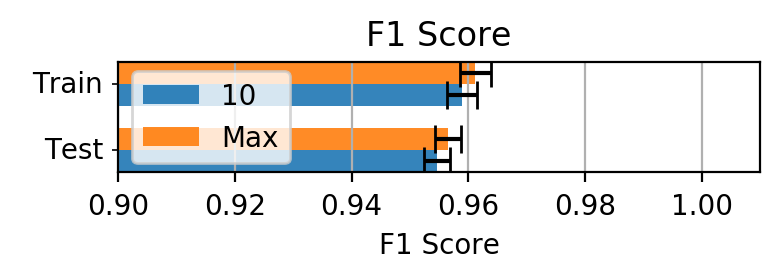

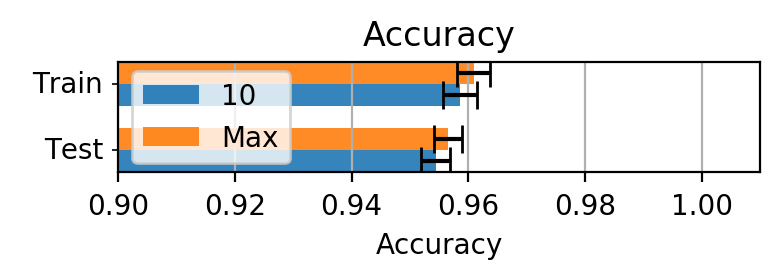

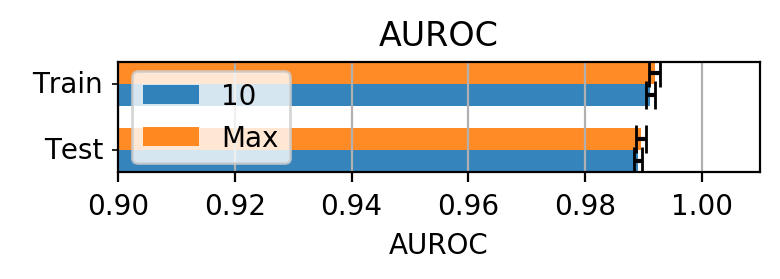

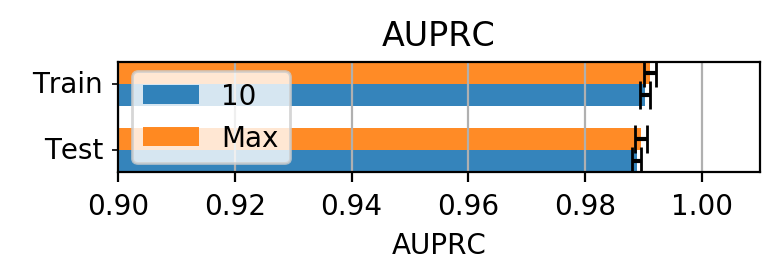

In [28]:
if os.path.exists("barplots"):
    shutil.rmtree("barplots")
index = ["run_type", "Max Neighbours"]
_ = barplots(
    df[index+["accuracy", "AUROC", "AUPRC", "f1_score"]],
    groupby=index,
    min_value=0.9,
    #show_legend=False,
    legend_position="center left",
    height=4,
    orientation="horizontal"
)